In [ ]:
# Handwritten Digit Classification

In [ ]:
# import dataset

In [ ]:
from keras.datasets import mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
xtrain.shape  # total 60000 images of 28 X 28

(60000, 28, 28)

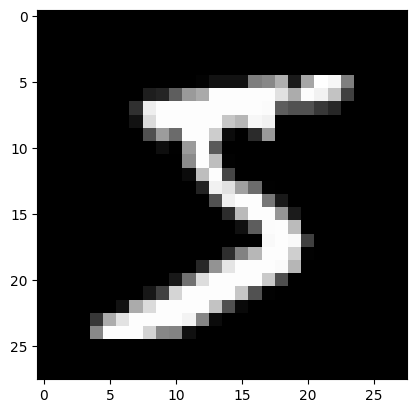

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')
plt.show()

In [ ]:
import seaborn as sns

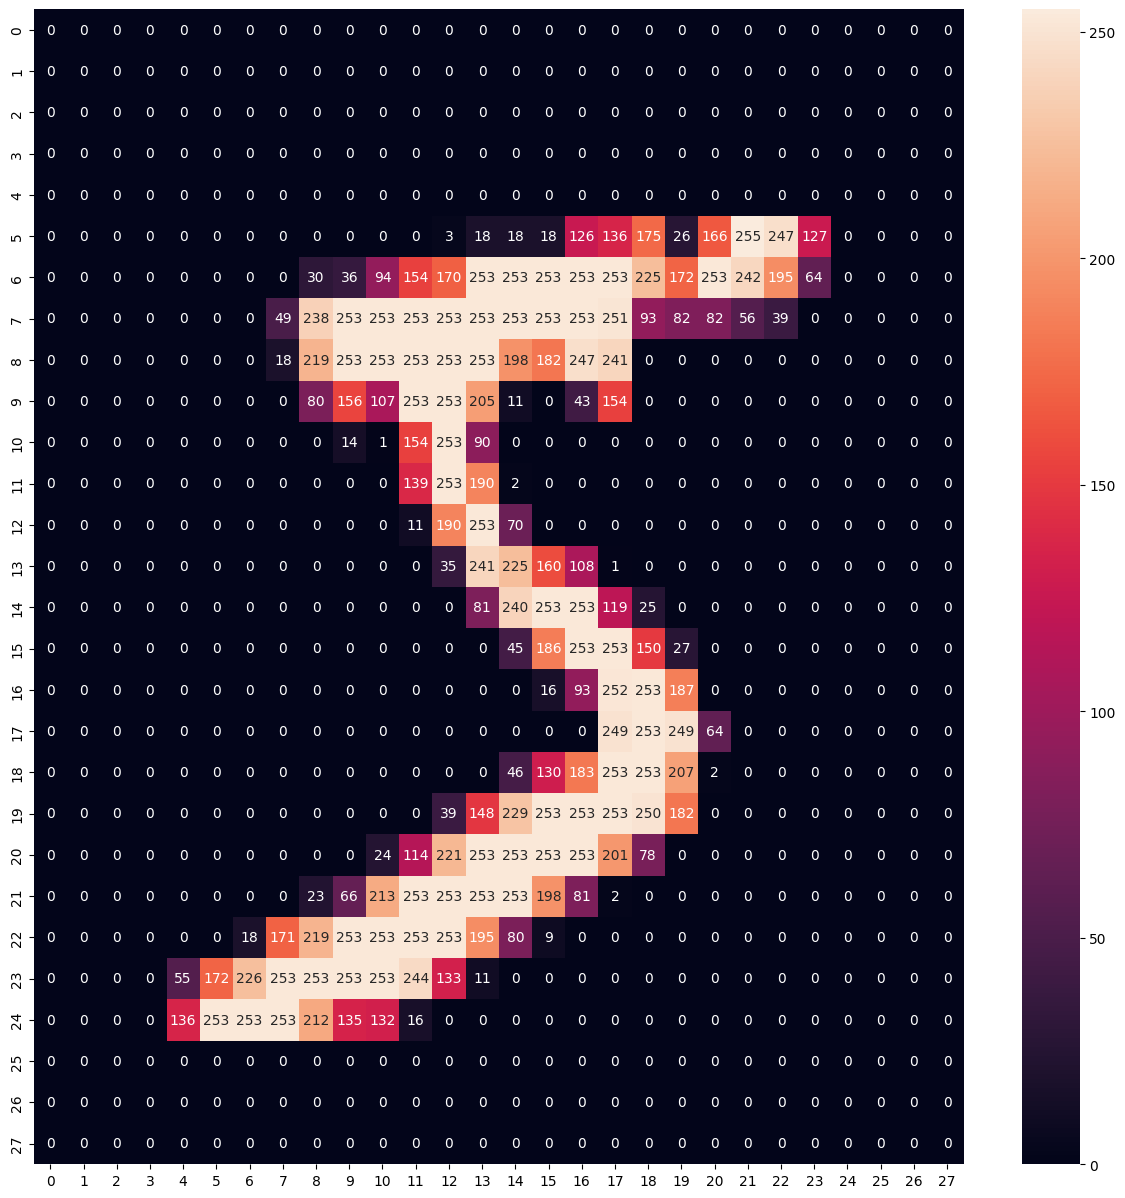

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0], annot = True , fmt='d')
plt.show()


In [ ]:
# view first 9 images from train data

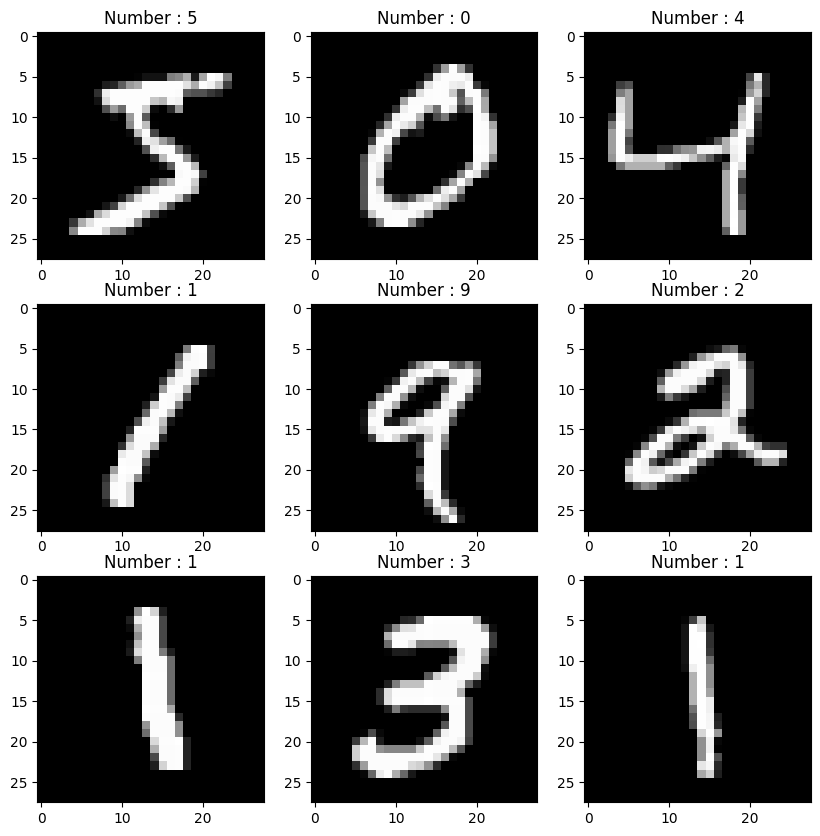

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f'Number : {ytrain[i]}')



In [ ]:
# Preprocessing the data

In [ ]:
## pixel values are between 0-255, so divide xtrain and xtest by 255 to scale it in range 0-1

In [ ]:
xtrain_scl = xtrain.astype('float32')/255
xtest_scl = xtest.astype('float32')/255

In [ ]:
# check how many unique values are in output traing data

In [ ]:
import numpy as np

In [ ]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# for multiclass classification apply one hot encoding on y feature

In [ ]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [ ]:
ytrain_cat[0:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
ytrain[0:3]

array([5, 0, 4], dtype=uint8)

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D, MaxPool2D, Flatten, Dropout, Dense

In [ ]:
# initialize the model
model = Sequential()

# Add input Layer
model.add(Input(shape=(28,28,1)))

# Add Convolution layer 1
model.add(Convolution2D(filters=32, activation = 'relu' , kernel_size=(3,3)))
# we dont have to worry about the values in filter matrix

# Add max pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Add Convolution layer 2
model.add(Convolution2D(filters=64, activation = 'relu' , kernel_size=(3,3)))

# Add Max Pooling layer 2
model.add(MaxPool2D(pool_size=(2,2)))

# Add a flatten layer
model.add(Flatten())

# Add a dropout layer
model.add(Dropout(0.5))

# Create a output layer
model.add(Dense(units=ytrain_cat.shape[1], activation='softmax'))


In [ ]:
# Compile and fit the model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist = model.fit(xtrain,ytrain_cat, validation_split=0.2, epochs = 15)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7762 - loss: 2.4507 - val_accuracy: 0.9718 - val_loss: 0.0969
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9505 - loss: 0.1680 - val_accuracy: 0.9817 - val_loss: 0.0587
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9631 - loss: 0.1249 - val_accuracy: 0.9821 - val_loss: 0.0574
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9676 - loss: 0.1070 - val_accuracy: 0.9817 - val_loss: 0.0578
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9700 - loss: 0.0958 - val_accuracy: 0.9821 - val_loss: 0.0573
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9707 - loss: 0.0964 - val_accuracy: 0.9864 - val_loss: 0.0465
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9771 - loss: 0.0751 - val_accuracy: 0.9862 - val_loss: 0.0502
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9764 - loss: 0.0784 -

In [ ]:
# plot learning curve

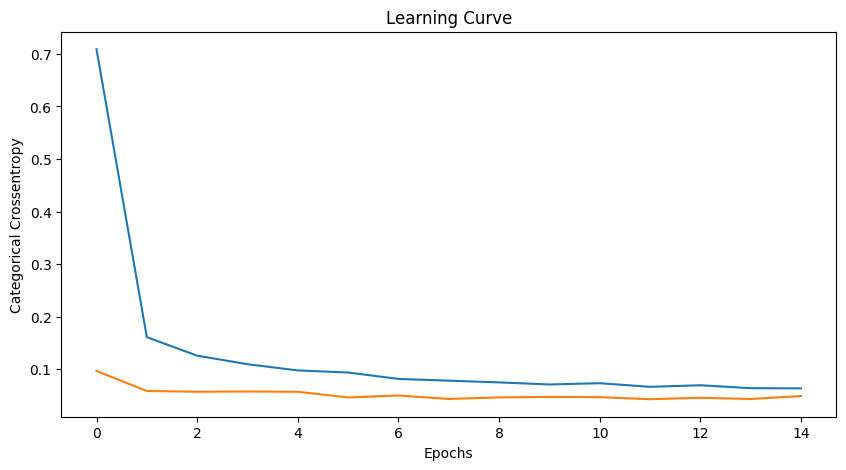

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve')
plt.show()


In [ ]:
# Model Evaluation

In [ ]:
model.evaluate(xtrain,ytrain_cat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9941 - loss: 0.0197


[0.024233302101492882, 0.9932666420936584]

In [ ]:
# Predict probabilities for training and testing

In [ ]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
yprob_train[:5]

array([[1.53028320e-13, 2.37569067e-15, 7.55511918e-14, 1.93402157e-04,
        1.89444768e-16, 9.99805927e-01, 2.24830361e-14, 2.26896366e-11,
        8.41384988e-08, 4.35692783e-07],
       [1.00000000e+00, 1.10030169e-16, 5.37131086e-08, 1.91827230e-14,
        1.82832861e-13, 1.55893466e-14, 4.62313832e-09, 2.14484074e-15,
        9.94686222e-10, 9.73068626e-10],
       [3.21202808e-13, 3.75041600e-06, 4.11351024e-08, 5.23536492e-11,
        9.98662829e-01, 9.39850531e-10, 2.71118711e-10, 1.33120746e-03,
        2.52983540e-07, 1.94843824e-06],
       [2.53967070e-09, 9.99995947e-01, 5.09338491e-08, 6.63852870e-12,
        4.82150369e-07, 2.69916446e-12, 1.30252115e-10, 6.83580652e-07,
        2.84184421e-06, 2.70776263e-10],
       [1.23296755e-11, 2.36898666e-14, 3.05485455e-12, 8.10023056e-12,
        1.40026282e-06, 1.20762965e-13, 3.64323197e-17, 4.06775547e-09,
        1.12301977e-05, 9.99987364e-01]], dtype=float32)

In [ ]:
yprob_test[:5]

array([[1.1771445e-10, 4.0058803e-11, 2.2918832e-07, 2.5226879e-07,
        2.5487315e-15, 2.9101239e-13, 2.5280488e-22, 9.9999928e-01,
        4.4390919e-10, 2.8264839e-07],
       [1.3810073e-07, 1.2123852e-13, 9.9999988e-01, 3.9340163e-12,
        9.7191646e-18, 1.0893113e-20, 1.4470353e-10, 9.6807829e-20,
        4.8313072e-11, 4.0357551e-18],
       [4.5944724e-08, 9.9999571e-01, 4.2649307e-07, 1.9779161e-09,
        1.0138242e-06, 4.2557273e-09, 4.7361885e-07, 1.0694023e-06,
        1.2381751e-06, 1.8312481e-10],
       [1.0000000e+00, 1.9002043e-20, 1.1604930e-09, 1.5832510e-15,
        9.1068895e-13, 1.8691907e-11, 3.4919267e-08, 2.2254872e-16,
        3.5000804e-09, 9.3335473e-09],
       [8.3243349e-14, 1.2928268e-17, 1.2097186e-15, 6.0395078e-19,
        1.0000000e+00, 8.2780030e-15, 2.0151587e-13, 3.0666857e-16,
        9.2680022e-12, 3.0337792e-09]], dtype=float32)

In [ ]:
# give final predictions

In [ ]:
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test,axis=1)

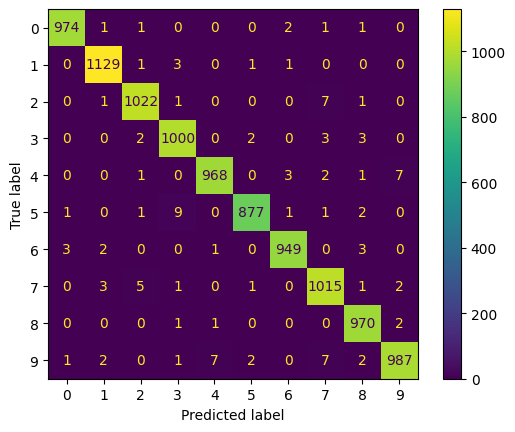

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cf= confusion_matrix(ytest , ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()